<a href="https://colab.research.google.com/github/whataLIN/DeepLearning/blob/main/whataLIN/ch09_DL_03_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network

# Fashion MNIST
* 28 x 28 px, 70,000개의 흑백 이미지로 구성
* 신발, 드레스, 가방 등 총 10가지 카테고리가 존재
![MNIST](https://codetorial.net/tensorflow/_images/fashion_MNIST_sample.png)

* torch.utils.data
    * 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는 데 쓰는 도구들이 들어있는 모듈
    * 파이토치 모델을 학습시키기 위한 데이터셋의 표준을 torch.utils.data.Dataset에 정의
    * Dataset 모듈을 상속하는 파생 클래스는 학습에 필요한 데이터를 로딩해주는 torch.utils.data.DataLoader 인스턴스의 입력으로 사용할 수 있음
* torchvision.datasets
    * torch.utils.data.Dataset을 상속하는 이미지 데이터셋의 모음. 패션 아이템 데이터셋이 바로 여기에 들어있음
* torchvision.transforms
    * 이미지 데이터셋에 쓸 수 있는 여러 가지 변환 필터를 담고 있는 모듈.
    * 예를 들어 텐서로 변환한다든지, 크기 조절(resize)과 크롭(crop)으로 이미지를 수정할 수도 있고, 밝기(brightness), 대비(contrast) 등을 조절하는 데 사용될 수도 있음
* torchvision.utils
    * 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어있는 모듈

In [5]:
from torchvision import datasets, transforms, utils
from torch.utils import data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 이미지를 텐서로 변환
# 토치비전의 transforms : 입력받은 이미지를 변환시키는 도구
# 기능을 추가하고 싶다 -> transforms.Compose() 함수 안의 리스트로 넣어주면 순서대로 변환

transform = transforms.Compose([
    transforms.ToTensor()
])

## Transforms에서 자주 쓰이는 기능
* ToTensor : 이미지를 파이토치 텐서로 변환
* Resize : 이미지 크기 조정
* Normalize : 주어진 평균과 표준편차를 이용하여 정규화
* RandomHorizontalFlip : 무작위로 이미지의 오른쪽과 왼쪽을 뒤집는 기능
* RandomCrop : 이미지를 무작위로 자르는 기능

In [8]:
# Fashion MNIST 데이터셋 불러오기
# 토치비전의 datesets 패키지 : 데이터셋을 내려받고, Compose로 만든 이미지 변환 설정을 적용하는데 사용
# 데이터셋을 번거롭게 다운로드 받을 필요 없고, 'download = True'. -> 현재 root 폴더. 데이터 존재 여부 판단 -> 다운로드 받아줌
# 훈련셋/시험셋 -> train = T/F

trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,  # 훈련셋
    download = True,
    transform = transform # ToTensor를 통해 이미지를 파이토치 Tensor화
)

testset = datasets.FashionMNIST(
    root = './.data/',
    train = False, # 시험셋
    download = True,
    transform = transform # ToTensor를 통해 이미지를 파이토치 Tensor화
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [9]:
!ls -a

.  ..  .config	.data  sample_data


In [10]:
# torchvision.datasets로 생성된 객체 -> 파이토치 내부 클래스 torch.utils.data.Dataset을 상속
# 파이토치 DataLoader (Dataset 클래스를 넣어줌) -> 모델의 데이터를 로딩 -> 바로 사용해줄 수 있음
# DataLoader는 데이터셋을 배치batch라는 작은 단위로 쪼개고, 학습 시 반복문 안에서 데이터를 공급해주는 클래스

# 배치 크기(batch size)를 지정
# -> 한 번에 처리하는 데이터 개수 (처리 -> 딥러닝 : 학습)
# 배치 크기가 16이다 -> 반복할 때마다 (한 번 로딩할 때) 16개씩 읽어줌
batch_size = 16
# 컴퓨터 메모리 공간에 여유가 있다면 더 크게 해도 되고, 여유가 없다면 적게 해야함 (2의 배수여야 함)

In [11]:
# 메모리 확인 명령어
!free

              total        used        free      shared  buff/cache   available
Mem:       13297200     1103696     8286396        1376     3907108    11907204
Swap:             0           0           0


In [12]:
# 데이터로더(DataLoader)의 매개변수에 앞서 불러온 데이터셋을 넣어주고 배치 크기를 지정
# 한 번에 16개씩의 배치를 로딩해주는 데이터로더 학습셋/시험셋

train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [13]:
# iter() 함수 : 반복되는 객체를 반복문 안에 이용할 수 있도록 만들어주는 함수
# next() 함수 : 배치 1개를 (아직 반복되지 않은 하나의 원소를) 불러와주는 함수
# 배치 1개의 images와 labels을 불러오는 구조 -> images, labels -> 앞서 설정한 배치 크기만큼 각각 이미지 16개와 레이블 16개가 들어있음

dataiter = iter(train_loader)
images, labels = next(dataiter)

(3, 56, 224)


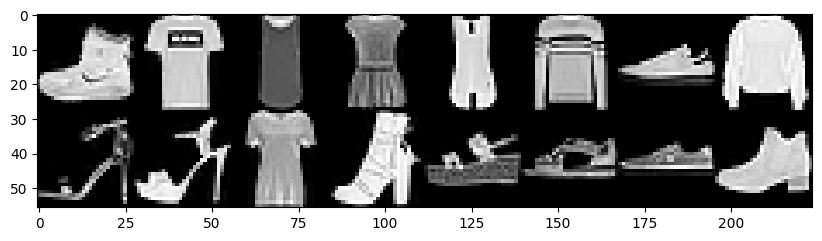

In [14]:
# utils.make_grid() 함수 -> 여러 이미지를 모아서 하나의 이미지
# img -> matplotlib 호환 -> numpy 배열로 변환
img = utils.make_grid(images, padding=0)       #격자 형태로 결합

npimg = img.numpy()   # 텐서 -> 넘파이 배열
print(npimg.shape) # 색상(0), 세로(1), 가로(2) -> (맷플롯립) 세로(1), 가로(2), 색상(0)
plt.figure(figsize=(10, 7))
# npimg - 이미지 넘파이 배열
# np.transpose -> 차원의 순서를 교체
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()



In [15]:
print(labels) # 각각의 패션아이템 종류 (한 배치 사이즈 : 16)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [16]:
# 이미지들의 클래스들은 '티셔츠/윗옷, 바지', 스웨터', '드레스', '코트', '샌들. 셔츠, '운동화', '가방, '앵글부츠, 이렇게 10가지
# 데이터셋에서는 이름 대신에 숫자 번호로 레이블이 주어짐 -> 딕셔너리화
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


* 이미지의 데이터는 가로, 세로, 색상으로 구성된 3차원 행렬로 표현
* 가로세로는 각각의 픽셀 수, 그리고 색상값은 흑백 사진이니 1가지 숫자로 나타낼 수 있음

![MNIST 데이터](https://github.com/BigData23th/Data/raw/main/dl_02_01.jpeg)

* 각 픽셀은 0부터 255까지 값을 가짐.
* Fashion MNIST에서 이미지의 크기는 28 x 28, 색상 채널은 흑백 1가지 → 입력 x의 특징값 총개 수는 28 x 28 x 1개, 즉 784개

(28, 28)


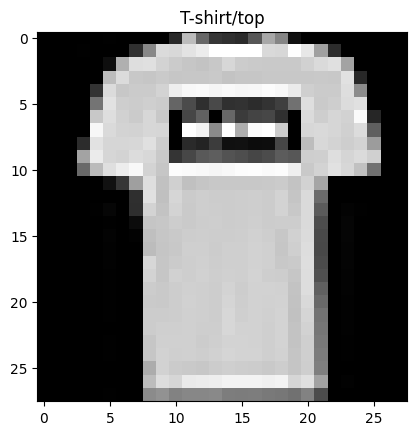

In [17]:
# 개별 이미지 보기 (0~15)
idx = 1 #@param {"type":"number"}

item_img = images[idx] # 첫번째 이미지 꺼내기
item_npimg = item_img.squeeze().numpy() # squeeze하고 numpy를 통해 넘파이 행렬로 만들기

plt.title(CLASSES[labels[idx].item()]) # 종류 보기
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

# 인공신경망으로 패션 아이템 분류
심층 인공 신경망 `deep neural network, DNN`

## 환경설정

In [18]:
import torch

# GPU 사용 환경
torch.cuda.is_available()
# 현재 컴퓨터(머신)에서 CUDA(GPU)를 사용할 수 있는지 확인
# 런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU

True

In [19]:
USE_CUDA = torch.cuda.is_available()
USE_CUDA

True

In [22]:
# USE_CUDA가 True면 cuda를 입력해서, GPU 장치를 사용하고, 아니면 CPU를 쓰겠다

DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [23]:
# 환경에 따라서 CPU / GPU 를 알아서 설정하게 하는 코드
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [24]:
# 효율적 학습을 위해 (데이터셋을) 배치로 잘라서 사용
BATCH_SIZE = 64     # 각 미니 배치의 크기 (2의 배수)
EPOCHS = 30         # 학습 데이터를 총 몇 번 볼 것인가

In [25]:
import torch # 파이토치
import torch.nn as nn # 인공 신경망 모델의 재료 -> 클래스 -> 객체 (값을 저장할 수 있음) -> 가중치가 저장되어야할 때
import torch.optim as optim # 최적화를 위한 모듈
import torch.nn.functional as F # nn 모듈의 함수 버전 -> 가중치 저장은 필요없고, 함수/기능만 필요
from torchvision import transforms, datasets # 토치비전의 데이터셋 다루기 

# 데이터셋 불러오기

In [28]:
# 이미지를 변환 시켜주는 transform 정의
transform = transforms.Compose(
    transforms.ToTensor()     #변환할 방식 추가
)

# 학습셋, 시험셋을 로딩 (다운로드)
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,  # 훈련셋
    download = True,
    transform = transform # ToTensor를 통해 이미지를 파이토치 Tensor화
)

testset = datasets.FashionMNIST(
    root = './.data/',
    train = False, # 시험셋
    download = True,
    transform = transform # ToTensor를 통해 이미지를 파이토치 Tensor화
)

# 반복해서 불러올 때 배치 사이즈, 방식
train_loader = torch.utils.data.DataLoader(
    dataset = trainset,      #연결할 데이터셋
    batch_size = BATCH_SIZE, #배치사이즈 - 한 번에 불러올 미니배치
    shuffle = True           #섞어줌
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = BATCH_SIZE,
    shuffle = True 
)


## 이미지 분류 문제
**이미지 분류** `image classification`
* 한 장의 이미지를 받아 이 이미지가 어느 클래스(레이블)에 속하는지 알려주는 문제
* 상대적으로 단순한 문제지만 상업적으로 가장 영향력이 있는 문제
* 인공 신경망을 이용한 이미지 분류 알고리즘들은 이미 여러 서비스에서 이미지 기반 검색, 추천, 광고 등에 사용
![이미지 분류](https://github.com/BigData23th/Data/raw/main/dl_02_02.jpeg)
* 연속된 이미지라고 할 수 있는 비디오 분류 모델들도 결국 기본적인 이미지 분류 방식에서 크게 벗어나지 않음

## 이미지 분류를 위한 인공 신경망 구현
입력 x와 레이블(정답) y를 받아서 학습한 다음, 새로운 X가 왔을 때 어떤 패션 아이템인지 예측하는 모델

### 인공 신경망 구성

In [29]:
# (은닉층) 레이어가 3개인 (깊이가 3인) 인공신경망 구성
class Net(nn.Module):

    # 먼저 생성자에 모델의 가중치 변수들이 들어가는 연산(객체)들을 선언
    # 클래스를 통해서 생성될 객체 -> self
    def __init__(self):
        super(Net, self).__init__()

        ## nn.Linear 클래스는 선형 결합을 수행하는 객체를 만듦
        self.fc1 = nn.Linear(784, 256) 
        # input 784(바꿀수없듬...), output 256
        # 1 x 28 x 28 -> 784 픽셀값(한 점씩)을 입력 받아서 가중치를 행렬곱/편향. 값 256개를 출력
        # fc는 fully connected -> 이전 레이어의 모든 노드가 다음 레이어의 모든 노드에 연결된 층 (Dense)
        
        self.fc2 = nn.Linear(256, 128)     # input 256, output 128
        self.fc3 = nn.Linear(128, 10)      # input 128, output 10
        # 출력값 10개 각각은 클래스가 될 확률을 나타내며, 10개 중 값이 가장 큰 클래스가 이 모델의 예측값의 될 것임
    

    # 훈련 과정을 표현
    def forward(self, x):    # x은 입력되는 텐서

        # 데이터의 흐름을 정의
        # n, 색상, 세로, 가로 ->  (-1, 784) # 64, 784 (배치 사이즈 만큼)
        # 입력을 받아 view) 함수를 이용하여 랭크 1 텐서로 변환
        x=x.view(-1, 784)   # 28px x 28px인 이미지 텐서를 784 한 줄짜리 1차원 텐서
        # x=x.view(-1, 28**2)
        # -1 : 나머지값들. (배치 사이즈, 데이터 사이즈...)
        
        # fc1()과 fc2()를 거치게 할 것, 각각 층은 ReLU 활성화 함수를 통해서 처리
        # F.relu == nn.ReLU (거의 동일, 취향 문제) -> 가중치가 없는 연산 (저장 X)
        # nn.Linear -> 선형결합 (가중치) -> 거의 강제. (init(생성자)에 선언하는 것이 권장)
        # x = self.fc1(x)
        # x=F.relu(x)
        x=F.relu(self.fc1(x)) #첫번째 은닉층을 거치고
        x=F.relu(self.fc2(x)) #은닉층1과 은닉층2를 거침
        

        # 마지막으로 fc3() 함수까지 거쳐 나온 값 10개
        x=self.fc3(x)
        return x

* 모델 선언과 동시에 to() 함수로 연산을 어디서 수행할지 정할 수 있음
* to() 함수는 모델의 파라미터들을 지정한 장치의 메모리로 보내는 역할을 함
* 일반적으로 CPU만 사용한다면 필요 없지만, GPU를 사용하려면 to("cuda")로 지정하여 GPU의 메모리로 보내야 함
* 아무것도 지정하지 않으면 CPU에서 처리

In [30]:
model = Net().to(DEVICE)
# 기기에 맞는 (CPU, GPU) 환경을 넣어서 처리

In [31]:
model

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

### 최적화 알고리즘

In [32]:
# 최적화 알고리즘 : 파이토치 내장 모듈인 optim.SGD를 사용
# SGD (확률적 경사하강법, stochastic gradient descent) : 모델 최적화를 확률적 경사하강법
# 모델 내부의 정보를 넘겨주는 model.parameters() 함수와 직접 설정한 학습률(lr)을 입력

optimizer = optim.SGD(model.parameters(), lr = 0.01)  #재학습 시 optimizer 활성화해야댐

### 학습

In [38]:
# 학습을 위한 연산을 train 함수로 정의
# train : 학습할 model, 데이터를 공급해주는 train_loader, 최적화를 담당할 optimizer를 넣을 것

def train(model : nn.Module, train_loader, optimizer):       # epoch 1번 = train 1번 = train 내부의 batch 사이즈별 학습이 따로 돎
    
    # 학습 모드
    # <-> model.eval() : 평가모드
    model.train()

    # 모드에 따라서 동작이 다른 파이토치 모듈 (dropout)
    # 배치를 반복하여서 훈련
    # enumerate(연속된 데이터) -> zip(인덱스, 값)
    for batch_idx, (data, target) in enumerate(train_loader):     #data는 이미지파일, target은 이미지가 어떤 값을 가지고 있는지에 대한 라벨

        # data : 모델에 입력할 data (이미지 텐서), target : 해당 이미지의 분류값. 클래스.
        # 모델에 입력될 데이터 모양(shape): [배치크기(64), 색, 높이(세로), 넓이(가로)]
        # data.size() : [64, 1, 28, 28] <- 배치 데이터
        # 모델의 가중치를 보낸 장치(DEVICE) -> 학습 데이터도 같은 장치로 보내야 함
        data, target = data.to(DEVICE), target.to(DEVICE)     #데이터를 장치로 보냄
        # cuda 사용가능한 컴퓨터라면 GPU, 아니면 CPU

        # 배치를 처리할 때마다 기울기를 새로 계산해줘야함 -> optimizer.zero_grad()
        optimizer.zero_grad()
        
        # 학습 데이터에 대한 모델의 예측값을 output
        output = model(data)  #순전파 진행됨

        # output -> 오차를 구해서 개선
        # output & 레이블(target, 정답) 사이의 오차 구하기
        loss = F.cross_entropy(output, target)    # 한 배치(64)에 대한 오차(손실) 2개 이상인 값에 있어서의 차이를 구함

        # 이진 교차 엔트로피 binary cross entropy : 클래스가 2개 (분류해야하는 대상이 2개)
        # **교차 엔트로피 cross entropy : 클래스가 3개 이상 (이번에는 10개)
        # F.cross_entropy -> 이것에 대한 기울기를 저장할 필요가 없어서 F 함수를 씀
        
        loss.backward()   # 오차 역전파로 기울기 (gradient) 계산
        optimizer.step()  # 계산한 기울기를 바탕으로 앞서 정의한 알고리즘에 맞추어 가중치를 수정 - 최적화함수를 통해 최적화 후 다시 전달
        

* 우리가 원하는 모델? : 학습 데이터에 최적화된 모델이 아닌 모든 데이터에 높은 성능을 보이는 모델
* 일반화 `generalization` : 세상에 존재하는 모든 데이터에 최적화하는 것
* 일반화 오류 `generalization error` : 학습 데이터를 기반으로 한 모델이 학습하지 않은 데이터에 얼마나 적응하는지를 수치로 나타낸 것
    * 일반화 오류는 학습과 실제 성능의 괴리를 뜻하므로 작을수록 좋음
* 학습 데이터의 일부를 떼어내어 평가용 데이터셋을 마련
* 평가용 데이터 셋 = 테스트셋 `test set`
    * 모델이 학습 과정에서 본 적이 없는 '실제 세상의 모든 데이터'를 대표

* Fashion MNIST는 비교적 규모가 작은 데이터셋이므로 학습과 테스트 두 가지로 나뉘어 있음
* 일반적인 머신러닝 데이터셋은 학습 `train`, 검증 `validator`, 테스트 `test` 3단계로 나뉨 . 7:2:1 비율
    * 학습용 데이터셋 : 가중치를 조절
    * 검증용 데이터셋 : 배치 크기와 모델 설계 같은 하이퍼파라미터 `hyperparameter`를 조절하는데 사용
    * 테스트용 데이터셋 : 성능 보고에 사용

* **하이퍼 파라미터** : 모델 층의 종류와 크기, 배치 크기, 학습률 등 머신러닝 모델이 배우지 않고 사용자가 직접 지정해주는 값
    * 모델의 가중치(파라미터 parameter)를 최적화하는 데 많은 영향을 주게 됨
    * 고로 하이퍼파라미터를 최적화하는 것도 딥러닝에서 데이터를 모으는 과정만큼이나 중요

In [40]:
# 평가 함수 evaluate
# 모델의 일반화 정도 확인 + 학습을 언제 멈춰야할지 알아냄 (조기종료)
def evaluate(model, test_loader):      # 최적화 담당하는 optimizer 없어도 됨
    # epoch가 끝날 때마다 테스트셋으로 모델의 성능을 측정
    model.eval()    # 평가 모드

    test_loss = 0 # 테스트셋의 오차
    correct = 0   # 예측이 맞은 갯수를 담아줄 변수

    # torch.no_grad() -> 생성 / with가 끝나면 해당 객체, 기능을 close.
    with torch.no_grad():      # 기울기 계산 끄기
        for data, target in test_loader:
            data, target = data.to(DEVICE), target(DEVICE)        # DEVICE로 데이터 보내기
            output = model(data)              # 테스트 데이터의 예측값

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()   #텐서 형태로 값이 저장됨 -> item으로 스칼라형태로 변환

            # 평가를 위해서 교차 엔트로피를 거칠 때 reduction을 'sum'을 지정
            # 원래 default는 mean(평균)
            # 모든 오차를 더해줌
            # ---
            # 정확도
            # 가장 큰 값을 가진 클래스가 모델의 예측값
            # -> output.max(1,...)[1] -> 가장 높게 나온 ㄴ확률을 가진 패션 아이템의 종류 인덱스를 추출
            # 예측과 정답을 비교하여서 일치할 경우 -> correct에 1을 더함 
            # output.max() -> (가장 큰 값(0), 그 값이 있는 자리의 인덱스(1))
            # print(output)
            # https://pytorch.org/docs/stable/generated/torch.Tensor.max.html
            
            pred = output.max(1, keepdim = True)[1]     # max(차원)
            #output은 총 10개. 가장 큰 값에 대한 인덱스만 남긴다
            # print(pred) !!!

            # 모델의 예측 패션 아이템과 레이블(정답)이 일치하는지는 eq (0, 1)
            # print(pred.eq(target.view_as(pred))) !!!!!!   -> target을 pred의 모양으로 변경
            correct += pred.eq(target.view_as(pred)).sum.item      #일치하는 것만 더해줌 - 일치하는 것들의 count
            
            # -> sum (모두 더하면 현 배치에서 모델을 맞춘 정답 개수 구함)
            # view_as -> 인수로 들어간 텐서의 모양으로 바꿔줌(정렬)
    # 배치별 총 오차와, 총 맞춘 개수를 합친 test_loss, correct

    # test_loss : 전체 데이터셋에 대한 오차 -> 배치별로 나눠져 있는 것의 합
    # correct : 맞힌 개수의 합
    # 총 정답 평균 -> 100을 곱해서 정확도 (accuracy) 구하기
    test_loss /= len(test_loader.dataset)   #평균오차
    
    test_accuracy = 100. * correct / len(test_loader.dataset)   # 얼마나 맞췄는지
    return test_loss, test_accuracy

In [41]:
# 에포크마다 학습과 테스트셋을 이용한 검증을 반복하고 결과를 출력
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

TypeError: ignored

## 과적합과 드롭아웃
* 과적합 `overfitting`
    * 학습 성능은 잘 나오지만, 테스트셋이나 실제 상황에서는 성능이 나오지 않을 때
    * 너무 학습 데이터에만 치중되어 유연성이 부족해지고, 그 결과 새로운 데이터에서는 성능이 잘 나오지 않는 상황 (예 : 기출문제만 공부하고 시험 치기)
* 과소적합 `underfitting`
    * 과적합과는 반대로 학습을 제대로 진행하지 않은 상황
    * 학습 데이터도 제대로 학습하지 않은 경우

**바람직한 상태?** → 과소적합과 과적합의 중간
* 학습 데이터와 학습하지 않은 실제 데이터에서 동시에 높은 성능을 내는 상태 = 일반화 `generalization`

![과소적합, 일반화, 과적합](https://github.com/BigData23th/Data/raw/main/dl_02_03.jpeg)

* 분류용 모델의 결과는 일반화를 지향.
* 데이터셋을 학습, 검증, 테스트셋으로 나누는 것도 과적합을 탐지하려는 노력의 일환
    * 학습 데이터셋만 이용해서 학습하면 오차는 무한정 내려갈 수밖에 없음. 실제로 학습을 멈추지 않고 계속 진행해보면 학습 성능은 계속 좋아지지만, 검증/테스트 성능이 오히려 떨어지는 것을 확인할 수 있음
    * 따라서 학습 중간중간 검증용 데이터셋으로 모델이 학습 데이터에만 과적합되지 않았는지 확인
* 검증 데이터셋에 대한 성능이 나빠지기 시작하기 직전이 가장 적합한 모델 → 이 타이밍에 모델을 저장하여 이용하는 것을 **조기 종료**`early stopping`라고 함

![조기종료](https://github.com/BigData23th/Data/raw/main/dl_02_04_.jpeg)

* 학습을 무한히 진행하다 보면 학습 오차는 꾸준히 내려가 0으로 수렴하지만, 검증 오차는 어느 순간부터 올라가게 됨 → 너무 학습 데이터셋에 과적합되므로 검증 오차가 올라가는 것
* 검증 오차가 올라가는 순간을 포착하여 학습을 종료하는 것이 바로 조기 종료
* 한편, 과적합 방지를 위해 학습 데이터를 늘리는 방법과 과적합 방지 기능을 하는 드롭아웃을 모델 구조에 적용하는 방법이 있음

### 데이터 늘리기
* 과적합을 막기 위해 이미 가진 데이터를 최대한 늘리는 방법data augmentation 을 적용
* 이미지 데이터라면 보통 이미지 일부분을 자르거나, 돌리고, 노이즈를 더하고, 색상을 변경하는 등 여러 방법을 사용할 수 있음
* 예) 오른쪽과 왼쪽을 뒤집는 가로 대칭 이동 전략

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       # 이미지를 무작위로 수평 뒤집기 (뒤집는 것만으로 예제 수가 2배로 늚)
                       
                       
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       
                       
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

* 좌우를 뒤바꾸어 학습 데이터 늘리기
![flip](https://github.com/BigData23th/Data/raw/main/dl_02_05.jpeg)

* 드롭아웃 `dropout`
  * 학습 진행 과정에서 신경망의 일부를 사용하지 않는 방법 (모델에 직접 영향을 주어 과적합을 해결)
  * 예) 50% 드롭아웃이면 학습 단계마다 절반의 뉴런만 사용, 검증과 테스트 단계에서는 모든 뉴런을 사용합니다
  * 학습에서 배제된 뉴런 외에 다른 뉴런들에 가중치를 분산시키고 개별 뉴런이 특징에 고정되는 현상을 방지하는 기능 (영향력이 큰 몇몇 요소들을 의도적으로 배제)
  
![드롭아웃](https://github.com/BigData23th/Data/raw/main/dl_02_06.jpeg)

In [ ]:
# 드롭 아웃 적용을 위한 신경망 구조 수정
class Net(nn.Module):
    def __init__(self, dropout_p = 0.2): # 직접 설정할 수 있게 생성자로 받음 (기본값 0.2)

        # 드롭아웃 비율을 결정하는 dropout_p 파라미터를 추가

    def forward(self, x): # forward에 dropout 관련 설정 추가

        
        # F.dropout() 함수는 가중치가 없으므로 torch.nn.functional 패키지에서 바로 가져와서 사용할 수 있음
        # 취향에 따라 nn.Dropout 클래스를 사용해도 무방
        # nn.Dropout은 내부적으로 F.dropout () 함수를 쓰며 self,training 등 몇 가지 내부 변수를 자동으로 적용해주는 모듈
        # nn.Dropout과 F.dropout()은 같은 기능의 클래스를 쓰느냐 함수를 쓰느냐 의 차이
        
        # 모델에는 학습과 평가 모드가 있음 → F.dropout () 함수는 모델의 모드에 따라 동작이 달라짐
        # 학습 모드에서만 드롭아웃을 하고 평가 모드에서는 모든 뉴런을 사용해야 하기 때문.
        
        # model.train ()과 model.eval() 함수를 호출하여 모드를 바꿀 때마다 모델 내부의 self.training 변숫값이 True나 False로 바뀜
        # 이 모델에선 layer1 층을 지나면서 한 번, layer2 층을 지나며 다시 한 번 드롭아웃

        # 신경망 층의 출력 x와 학습인지를 알려주는 self.training, 그리고 드롭아웃 확률인 self. dropout_p를 입력해줌
        # 드롭아웃 추가

        # 드롭아웃 추가

        return x

In [ ]:
# 드롭아웃 확률을 추가하여 모델 객체 생성 (모델을 인스턴스화)


In [ ]:
# 데이터셋에 노이즈를 추가(변형)하거나 모델에 드롭아웃을 적용할 때,
# 최고 성능에 도달하는 데까지 걸리는 시간은 길어짐 ← 데이터셋이 늘고, 모델이 느리게 학습되기 때문
# 에포크를 늘려서 학습 → 정확도가 눈에 띄게 높이 시작해서 꾸준히 오랫동안 증가
EPOCHS = 50
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print(f'[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

[1] Test Loss: 0.6509, Accuracy: 76.53%
[2] Test Loss: 0.5439, Accuracy: 80.38%
[3] Test Loss: 0.4874, Accuracy: 82.34%
[4] Test Loss: 0.4649, Accuracy: 82.88%
[5] Test Loss: 0.4431, Accuracy: 83.98%
[6] Test Loss: 0.4266, Accuracy: 84.53%
[7] Test Loss: 0.4177, Accuracy: 84.92%
[8] Test Loss: 0.4115, Accuracy: 85.02%
[9] Test Loss: 0.4009, Accuracy: 85.70%
[10] Test Loss: 0.3921, Accuracy: 85.73%
[11] Test Loss: 0.3887, Accuracy: 85.96%
[12] Test Loss: 0.3830, Accuracy: 86.16%
[13] Test Loss: 0.3805, Accuracy: 86.15%
[14] Test Loss: 0.3689, Accuracy: 86.86%
[15] Test Loss: 0.3678, Accuracy: 86.70%
[16] Test Loss: 0.3632, Accuracy: 87.04%
[17] Test Loss: 0.3622, Accuracy: 87.01%
[18] Test Loss: 0.3554, Accuracy: 87.09%
[19] Test Loss: 0.3501, Accuracy: 87.55%
[20] Test Loss: 0.3476, Accuracy: 87.62%
[21] Test Loss: 0.3529, Accuracy: 87.05%
[22] Test Loss: 0.3452, Accuracy: 87.61%
[23] Test Loss: 0.3471, Accuracy: 87.53%
[24] Test Loss: 0.3402, Accuracy: 87.96%
[25] Test Loss: 0.3360, A